37902 Foundation of Advanced Quantitative Marketing

Li Liu

2/8/2019

#### Tasks
1)      Fit latent-segment / latent-class / discrete heterogeneity model with 2 segments

2)      Try 2, 3, 4, and 5 segments. What is the BIC criterion telling you?

3)      Compute the elasticities and show how IIA is now violated at the aggregate

4)      Compute the posterior assignment and compare the size of the a priori segment sizes to the numbers allocated to the segments.

5)      Try the concomitant variable model.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt
pd.options.display.max_colwidth = 1000

### Yogurt100N Sales Data

In [50]:
df=pd.read_excel("Yogurt100N.csv.xlsx")
df.describe()
df.head()

,Pan I.D.,Expend $,Income,HH Size,IPT,Quantity,Brand 1,Brand 2,Brand 3,Brand 4,Feature 1,Feature 2,Feature 3,Feature 4,Price 1,Price 2,Price 3,Price 4,PanelistFirstObs
0,1,40.900002,9,2,5,2,0,0,0,1,0,0,0,0,0.108,0.081,0.061,0.079,1
1,1,16.809999,9,2,5,2,0,1,0,0,0,0,0,0,0.108,0.098,0.064,0.075,0
2,1,4.060000,9,2,1,2,0,1,0,0,0,0,0,0,0.108,0.098,0.061,0.086,0
3,1,34.459999,9,2,4,2,0,1,0,0,0,0,0,0,0.108,0.098,0.061,0.086,0
4,1,8.390000,9,2,7,2,0,1,0,0,0,0,0,0,0.125,0.098,0.049,0.079,0


### Model without heterogeneity

In [51]:
def crit(params,df):

    a1,a2,a3,bf,bp=params
    ev1=np.exp(a1+bf*df['Feature 1']+bp*df['Price 1'])
    ev2=np.exp(a2+bf*df['Feature 2']+bp*df['Price 2'])
    ev3=np.exp(a3+bf*df['Feature 3']+bp*df['Price 3'])
    ev4=np.exp(0+bf*df['Feature 4']+bp*df['Price 4'])
    denom=ev1+ev2+ev3+ev4
    pc=(ev1*df['Brand 1']+ev2*df['Brand  2']+ev3*df['Brand 3']+ev4*df['Brand 4'])/denom
    Inpc=np.log(pc)
    LL=np.sum(Inpc)
    return -LL
a1,a2,a3,bf,bp=1,1,1,1,1 #Initalization
params_init = np.array([a1,a2,a3,bf,bp])
results = opt.minimize(crit, params_init,df)
a1,a2,a3,bf,bp = results.x
BIC1=np.log(df.shape[0])*(5)-2*(-results.fun)

### Discrete Heterogeneity Model with 2 Segments

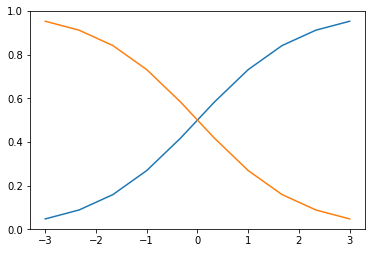

In [4]:
#pi,p2 (1-pi) is the probability of belonging to segement 1, 2
#When lam is initialized at 0, the probabilities of belonging to seg 1 and seg 2 are 0.5
lam=np.linspace(-3,3,10)
pi=np.exp(lam)/(1+np.exp(lam))
plt.plot(lam,pi)
plt.plot(lam,1-pi)
plt.show()

In [5]:
def crit(params,df):

    a11,a21,a31,bf1,bp1,a12,a22,a32,bf2,bp2,lam=params
    
    ev11=np.exp(a11+bf1*df['Feature 1']+bp1*df['Price 1'])
    ev21=np.exp(a21+bf1*df['Feature 2']+bp1*df['Price 2'])
    ev31=np.exp(a31+bf1*df['Feature 3']+bp1*df['Price 3'])
    ev41=np.exp(0+bf1*df['Feature 4']+bp1*df['Price 4'])
    denom1=ev11+ev21+ev31+ev41
    df['pc1']=(ev11*df['Brand 1']+ev21*df['Brand  2']+ev31*df['Brand 3']+ev41*df['Brand 4'])/denom1

    ev12=np.exp(a12+bf2*df['Feature 1']+bp2*df['Price 1'])
    ev22=np.exp(a22+bf2*df['Feature 2']+bp2*df['Price 2'])
    ev32=np.exp(a32+bf2*df['Feature 3']+bp2*df['Price 3'])
    ev42=np.exp(0+bf2*df['Feature 4']+bp2*df['Price 4'])
    denom2=ev12+ev22+ev32+ev42
    df['pc2']=(ev12*df['Brand 1']+ev22*df['Brand  2']+ev32*df['Brand 3']+ev42*df['Brand 4'])/denom2
    
    pc_agg=df.groupby("Pan I.D.")['pc1','pc2'].prod()
    
    pi=np.exp(lam)/(1+np.exp(lam))
    pc_agg_seg=pc_agg['pc1']*pi+pc_agg['pc2']*(1-pi)
    
    Inpc=np.log(pc_agg_seg)
    
    LL=np.sum(Inpc)
    
    return -LL

a11,a21,a31,bf1,bp1,a12,a22,a32,bf2,bp2,lam=\
     a1+0.01,a2+0.01,a3+0.01,bf+0.01,bp+0.01,a1-0.01,a2-0.01,a3-0.01,bf-0.01,bp-0.01,0
params_init = np.array([a11,a21,a31,bf1,bp1,a12,a22,a32,bf2,bp2,lam])
results2 = opt.minimize(crit, params_init,df,tol=1e-20, method='L-BFGS-B')
a11,a21,a31,bf1,bp1,a12,a22,a32,bf2,bp2,lam = results2.x

pd.DataFrame({"Seg1":[a11,a21,a31,bf1,bp1],'Seg2':[a12,a22,a32,bf2,bp2]},
             index=['a1','a2','a3','bf','bp'])

,Seg1,Seg2
a1,2.697884,1.333542
a2,3.852038,-1.294329
a3,-0.673545,-4.284921
bf,1.426345,0.377341
bp,-50.363053,-36.917332


In [10]:
#The estimated values are close, but not exactly the same as the ones from Excel sheet.
#Excel and Scipy might have slightly different optimization procedures and algorithms.

print("Probability of belonging to seg 1:",round(np.exp(lam)/(1+np.exp(lam)),2))
print("Probability of belonging to seg 2:",1-round(np.exp(lam)/(1+np.exp(lam)),2))
print("Maximized Log Likelihood Function Value:",-results.fun)
BIC2=np.log(df.shape[0])*(11)-2*(-results2.fun)
print("BIC:",BIC2)

Probability of belonging to seg 1: 0.48
Probability of belonging to seg 2: 0.52
Maximized Log Likelihood Function Value: -2658.5566975071233
BIC: 3917.3542172681377


### Discrete Heterogeneity Model with 3 Segments

In [11]:
def crit(params,df):

    a11,a21,a31,bf1,bp1,\
    a12,a22,a32,bf2,bp2,\
    a13,a23,a33,bf3,bp3,lam1,lam2=params
    
    
    ev11=np.exp(a11+bf1*df['Feature 1']+bp1*df['Price 1'])
    ev21=np.exp(a21+bf1*df['Feature 2']+bp1*df['Price 2'])
    ev31=np.exp(a31+bf1*df['Feature 3']+bp1*df['Price 3'])
    ev41=np.exp(0+bf1*df['Feature 4']+bp1*df['Price 4'])
    denom1=ev11+ev21+ev31+ev41
    df['pc1']=(ev11*df['Brand 1']+ev21*df['Brand  2']+ev31*df['Brand 3']+ev41*df['Brand 4'])/denom1

    ev12=np.exp(a12+bf2*df['Feature 1']+bp2*df['Price 1'])
    ev22=np.exp(a22+bf2*df['Feature 2']+bp2*df['Price 2'])
    ev32=np.exp(a32+bf2*df['Feature 3']+bp2*df['Price 3'])
    ev42=np.exp(0+bf2*df['Feature 4']+bp2*df['Price 4'])
    denom2=ev12+ev22+ev32+ev42
    df['pc2']=(ev12*df['Brand 1']+ev22*df['Brand  2']+ev32*df['Brand 3']+ev42*df['Brand 4'])/denom2

    ev13=np.exp(a13+bf3*df['Feature 1']+bp3*df['Price 1'])
    ev23=np.exp(a23+bf3*df['Feature 2']+bp3*df['Price 2'])
    ev33=np.exp(a33+bf3*df['Feature 3']+bp3*df['Price 3'])
    ev43=np.exp(0+bf3*df['Feature 4']+bp3*df['Price 4'])
    denom3=ev13+ev23+ev33+ev43
    df['pc3']=(ev13*df['Brand 1']+ev23*df['Brand  2']+ev33*df['Brand 3']+ev43*df['Brand 4'])/denom3
    
    pc_agg=df.groupby("Pan I.D.")['pc1','pc2','pc3'].prod()
    
    pi1=np.exp(lam1)/(1+np.exp(lam1) + np.exp(lam2))
    pi2=np.exp(lam2)/(1+np.exp(lam1) + np.exp(lam2))
    pi3=1-pi1-pi2
    
    pc_agg_seg=pc_agg['pc1']*pi1+pc_agg['pc2']*pi2+pc_agg['pc3']*pi3
    
    Inpc=np.log(pc_agg_seg)
    
    LL=np.sum(Inpc)
    
    return -LL

params_init = np.array([a11+0.01,a21+0.01,a31+0.01,bf1+0.01,bp1+0.01,\
                        a12-0.01,a22-0.01,a32-0.01,bf2-0.01,bp2-0.01,\
                        a1,a2,a3,bf,bp,0, 0])
results3 = opt.minimize(crit, params_init,df,tol=1e-20, method='L-BFGS-B')
a11,a21,a31,bf1,bp1,a12,a22,a32,bf2,bp2,a13,a23,a33,bf3,bp3,lam1,lam2 = results3.x

pd.DataFrame({"Seg1":[a11,a21,a31,bf1,bp1],
              'Seg2':[a12,a22,a32,bf2,bp2],
              'Seg3':[a13,a23,a33,bf3,bp3]},
              index=['a1','a2','a3','bf','bp'])

,Seg1,Seg2,Seg3
a1,1.967887,-1.086649,5.143960
a2,3.007868,-2.640609,1.403734
a3,-1.649586,-6.075738,-1.843369
bf,1.313881,1.060463,-0.184570
bp,-55.503285,-20.222465,-57.496687


In [12]:
print("Probability of belonging to seg 1:",np.exp(lam1)/(1+np.exp(lam1)+np.exp(lam2)))
print("Probability of belonging to seg 2:",np.exp(lam2)/(1+np.exp(lam1)+np.exp(lam2)))
print("Probability of belonging to seg 3:",1/(1+np.exp(lam1)+np.exp(lam2)))
print("Maximized Log Likelihood Function Value:",-results3.fun)
BIC3=np.log(df.shape[0])*(17)-2*(-results3.fun)
print("BIC:",BIC3)

Probability of belonging to seg 1: 0.5106184029242334
Probability of belonging to seg 2: 0.1472600459305429
Probability of belonging to seg 3: 0.34212155114522363
Maximized Log Likelihood Function Value: -1482.9701608555904
BIC: 3098.466312828869


### Discrete Heterogeneity Model with 4 Segments with Elasticities

In [21]:
def crit(params,df):

    a11,a21,a31,bf1,bp1,a12,a22,a32,bf2,bp2,\
        a13,a23,a33,bf3,bp3,a14,a24,a34,bf4,bp4,lam1,lam2,lam3=params
    
    #Segment 1
    ev11=np.exp(a11+bf1*df['Feature 1']+bp1*df['Price 1'])
    ev21=np.exp(a21+bf1*df['Feature 2']+bp1*df['Price 2'])
    ev31=np.exp(a31+bf1*df['Feature 3']+bp1*df['Price 3'])
    ev41=np.exp(0+bf1*df['Feature 4']+bp1*df['Price 4'])
    denom1=ev11+ev21+ev31+ev41
    df['pc1_4']=(ev11*df['Brand 1']+ev21*df['Brand  2']+ev31*df['Brand 3']+ev41*df['Brand 4'])/denom1
    
    #Segment 2
    ev12=np.exp(a12+bf2*df['Feature 1']+bp2*df['Price 1'])
    ev22=np.exp(a22+bf2*df['Feature 2']+bp2*df['Price 2'])
    ev32=np.exp(a32+bf2*df['Feature 3']+bp2*df['Price 3'])
    ev42=np.exp(0+bf2*df['Feature 4']+bp2*df['Price 4'])
    denom2=ev12+ev22+ev32+ev42
    df['pc2_4']=(ev12*df['Brand 1']+ev22*df['Brand  2']+ev32*df['Brand 3']+ev42*df['Brand 4'])/denom2

    #Segment 3
    ev13=np.exp(a13+bf3*df['Feature 1']+bp3*df['Price 1'])
    ev23=np.exp(a23+bf3*df['Feature 2']+bp3*df['Price 2'])
    ev33=np.exp(a33+bf3*df['Feature 3']+bp3*df['Price 3'])
    ev43=np.exp(0+bf3*df['Feature 4']+bp3*df['Price 4'])
    denom3=ev13+ev23+ev33+ev43
    df['pc3_4']=(ev13*df['Brand 1']+ev23*df['Brand  2']+ev33*df['Brand 3']+ev43*df['Brand 4'])/denom3
    
    #Segment 4
    ev14=np.exp(a14+bf4*df['Feature 1']+bp4*df['Price 1'])
    ev24=np.exp(a24+bf4*df['Feature 2']+bp4*df['Price 2'])
    ev34=np.exp(a34+bf4*df['Feature 3']+bp4*df['Price 3'])
    ev44=np.exp(0+bf4*df['Feature 4']+bp4*df['Price 4'])
    denom4=ev14+ev24+ev34+ev44
    df['pc4_4']=(ev14*df['Brand 1']+ev24*df['Brand  2']+ev34*df['Brand 3']+ev44*df['Brand 4'])/denom4
    
    #Probability of belonging to each segment
    global pi1,pi2,pi3,pi4
    pi1=np.exp(lam1)/(1+np.exp(lam1) + np.exp(lam2) + np.exp(lam3))
    pi2=np.exp(lam2)/(1+np.exp(lam1) + np.exp(lam2) + np.exp(lam3))
    pi3=np.exp(lam3)/(1+np.exp(lam1) + np.exp(lam2) + np.exp(lam3))
    pi4=1-pi1-pi2-pi3    
    
    #Aggregated Log Likelihood
    pc_agg=df.groupby("Pan I.D.")['pc1_4','pc2_4','pc3_4','pc4_4'].prod()
    pc_agg_seg=pi1*pc_agg["pc1_4"]+pi2*pc_agg["pc2_4"]+pi3*pc_agg["pc3_4"]+pi4*pc_agg["pc4_4"]
    Inpc=np.log(pc_agg_seg)   
    LL=np.sum(Inpc)
    
    #Prob of choosing different brands conditional on segments
    global p11,p21,p31,p41,p12,p22,p32,p42,p13,p23,p33,p43,p14,p24,p34,p44
    p11,p21,p31,p41=ev11/denom1,ev21/denom1,ev31/denom1,ev41/denom1
    p12,p22,p32,p42=ev12/denom2,ev22/denom2,ev32/denom2,ev42/denom2
    p13,p23,p33,p43=ev13/denom3,ev23/denom3,ev33/denom3,ev43/denom3
    p14,p24,p34,p44=ev14/denom4,ev24/denom4,ev34/denom4,ev44/denom4
    
    #Unconditional Prob of choosing different brands 
    global Pi1t,Pi2t,Pi3t,Pi4t
    Pi1t=p11*pi1+p12*pi2+p13*pi3+p14*pi4
    Pi2t=p21*pi1+p22*pi2+p23*pi3+p24*pi4
    Pi3t=p31*pi1+p32*pi2+p33*pi3+p34*pi4
    Pi4t=p41*pi1+p42*pi2+p43*pi3+p44*pi4
    
    return -LL


In [22]:
params_init = np.array([a11+0.01,a21+0.01,a31+0.01,bf1+0.01,bp1+0.01,\
                        a12-0.01,a22-0.01,a32-0.01,bf2-0.01,bp2-0.01,\
                        a13+0.01,a23+0.01,a33+0.01,bf3+0.01,bp3+0.01,\
                        a1,a2,a3,bf,bp,0,0,0])
results4 = opt.minimize(crit, params_init,df,tol=1e-20, method='L-BFGS-B')
a11,a21,a31,bf1,bp1,a12,a22,a32,bf2,bp2,\
    a13,a23,a33,bf3,bp3,a14,a24,a34,bf4,bp4,lam1,lam2,lam3 = results4.x

pd.DataFrame({"Seg1":[a11,a21,a31,bf1,bp1],
              'Seg2':[a12,a22,a32,bf2,bp2],
              'Seg3':[a13,a23,a33,bf3,bp3],
              'Seg4':[a14,a24,a34,bf4,bp4]},
              index=['a1','a2','a3','bf','bp'])

,Seg1,Seg2,Seg3,Seg4
a1,2.349784,-1.452299,5.176444,1.070108
a2,4.065902,-4.004152,1.418020,0.222895
a3,-0.893398,-31.832989,-1.874630,-2.434540
bf,0.925740,1.095234,-0.187295,1.009210
bp,-40.992809,-14.780308,-56.372235,-49.624915


In [29]:
print("Probability of belonging to seg 1:",np.exp(lam1)/(1+np.exp(lam1)+np.exp(lam2)+np.exp(lam3)))
print("Probability of belonging to seg 2:",np.exp(lam2)/(1+np.exp(lam1)+np.exp(lam2)+np.exp(lam3)))
print("Probability of belonging to seg 3:",np.exp(lam3)/(1+np.exp(lam1)+np.exp(lam2)+np.exp(lam3)))
print("Probability of belonging to seg 4:",1/(1+np.exp(lam1)+np.exp(lam2)+np.exp(lam3)))
print("Maximized Log Likelihood Function Value:",-results4.fun)
BIC4=np.log(df.shape[0])*(23)-2*(-results4.fun)
print("BIC:",BIC4)

Probability of belonging to seg 1: 0.32700140721876375
Probability of belonging to seg 2: 0.11791179670319828
Probability of belonging to seg 3: 0.30932105131684784
Probability of belonging to seg 4: 0.24576574476119
Maximized Log Likelihood Function Value: -1389.9893482138084
BIC: 2959.2785667633125


### Discrete Heterogeneity Model with 5 Segments

In [26]:
def crit(params,df):

    a11,a21,a31,bf1,bp1,a12,a22,a32,bf2,bp2,\
    a13,a23,a33,bf3,bp3,a14,a24,a34,bf4,bp4,a15,a25,a35,bf5,bp5,lam1,lam2,lam3,lam4=params
    
    
    ev11=np.exp(a11+bf1*df['Feature 1']+bp1*df['Price 1'])
    ev21=np.exp(a21+bf1*df['Feature 2']+bp1*df['Price 2'])
    ev31=np.exp(a31+bf1*df['Feature 3']+bp1*df['Price 3'])
    ev41=np.exp(0+bf1*df['Feature 4']+bp1*df['Price 4'])
    denom1=ev11+ev21+ev31+ev41
    df['pc1']=(ev11*df['Brand 1']+ev21*df['Brand  2']+ev31*df['Brand 3']+ev41*df['Brand 4'])/denom1

    ev12=np.exp(a12+bf2*df['Feature 1']+bp2*df['Price 1'])
    ev22=np.exp(a22+bf2*df['Feature 2']+bp2*df['Price 2'])
    ev32=np.exp(a32+bf2*df['Feature 3']+bp2*df['Price 3'])
    ev42=np.exp(0+bf2*df['Feature 4']+bp2*df['Price 4'])
    denom2=ev12+ev22+ev32+ev42
    df['pc2']=(ev12*df['Brand 1']+ev22*df['Brand  2']+ev32*df['Brand 3']+ev42*df['Brand 4'])/denom2

    ev13=np.exp(a13+bf3*df['Feature 1']+bp3*df['Price 1'])
    ev23=np.exp(a23+bf3*df['Feature 2']+bp3*df['Price 2'])
    ev33=np.exp(a33+bf3*df['Feature 3']+bp3*df['Price 3'])
    ev43=np.exp(0+bf3*df['Feature 4']+bp3*df['Price 4'])
    denom3=ev13+ev23+ev33+ev43
    df['pc3']=(ev13*df['Brand 1']+ev23*df['Brand  2']+ev33*df['Brand 3']+ev43*df['Brand 4'])/denom3
    
    ev14=np.exp(a14+bf4*df['Feature 1']+bp4*df['Price 1'])
    ev24=np.exp(a24+bf4*df['Feature 2']+bp4*df['Price 2'])
    ev34=np.exp(a34+bf4*df['Feature 3']+bp4*df['Price 3'])
    ev44=np.exp(0+bf4*df['Feature 4']+bp4*df['Price 4'])
    denom4=ev14+ev24+ev34+ev44
    df['pc4']=(ev14*df['Brand 1']+ev24*df['Brand  2']+ev34*df['Brand 3']+ev44*df['Brand 4'])/denom4

    ev15=np.exp(a15+bf5*df['Feature 1']+bp5*df['Price 1'])
    ev25=np.exp(a25+bf5*df['Feature 2']+bp5*df['Price 2'])
    ev35=np.exp(a35+bf5*df['Feature 3']+bp5*df['Price 3'])
    ev45=np.exp(0+bf5*df['Feature 4']+bp5*df['Price 4'])
    denom5=ev15+ev25+ev35+ev45
    df['pc5']=(ev15*df['Brand 1']+ev25*df['Brand  2']+ev35*df['Brand 3']+ev45*df['Brand 4'])/denom5
    
    pc_agg=df.groupby("Pan I.D.")['pc1','pc2','pc3','pc4','pc5'].prod()
    
    pi1=np.exp(lam1)/(1+np.exp(lam1) + np.exp(lam2) + np.exp(lam3) + np.exp(lam4))
    pi2=np.exp(lam2)/(1+np.exp(lam1) + np.exp(lam2) + np.exp(lam3) + np.exp(lam4))
    pi3=np.exp(lam3)/(1+np.exp(lam1) + np.exp(lam2) + np.exp(lam3) + np.exp(lam4))
    pi4=np.exp(lam4)/(1+np.exp(lam1) + np.exp(lam2) + np.exp(lam3) + np.exp(lam4))
    pi5=1-pi1-pi2-pi3-pi4
    
    pc_agg_seg=pc_agg['pc1']*pi1+pc_agg['pc2']*pi2+pc_agg['pc3']*pi3+\
                pc_agg['pc4']*pi4+pc_agg['pc5']*pi5
    
    Inpc=np.log(pc_agg_seg)
    
    LL=np.sum(Inpc)
    
    return -LL

params_init = np.array([a11+0.01,a21+0.01,a31+0.01,bf1+0.01,bp1+0.01,\
                        a12-0.01,a22-0.01,a32-0.01,bf2-0.01,bp2-0.01,\
                        a13+0.01,a23+0.01,a33+0.01,bf3+0.01,bp3+0.01,\
                        a14-0.01,a24-0.01,a34-0.01,bf4-0.01,bp4-0.01,\
                        a1,a2,a3,bf,bp,0,0,0,0])
results5 = opt.minimize(crit, params_init,df,tol=1e-20, method='L-BFGS-B')
a11,a21,a31,bf1,bp1,a12,a22,a32,bf2,bp2,\
    a13,a23,a33,bf3,bp3,a14,a24,a34,bf4,bp4,\
    a15,a25,a35,bf5,bp5,lam1,lam2,lam3,lam4 = results5.x

pd.DataFrame({"Seg1":[a11,a21,a31,bf1,bp1],
              'Seg2':[a12,a22,a32,bf2,bp2],
              'Seg3':[a13,a23,a33,bf3,bp3],
              'Seg4':[a14,a24,a34,bf4,bp4],
              'Seg5':[a15,a25,a35,bf5,bp5]},
              index=['a1','a2','a3','bf','bp'])

,Seg1,Seg2,Seg3,Seg4,Seg5
a1,0.515621,-1.451985,5.273474,0.834939,5.781181
a2,3.977627,-4.005055,-0.039736,0.176080,4.794104
a3,-0.744810,-31.842989,-2.234807,-2.312650,-1.093600
bf,0.483312,1.094973,0.317858,1.037696,0.642325
bp,-36.808101,-14.764871,-64.825017,-45.703172,-49.337904


In [27]:
print("Probability of belonging to seg 1:",np.exp(lam1)/(1+np.exp(lam1)+np.exp(lam2)+np.exp(lam3)+np.exp(lam4)))
print("Probability of belonging to seg 2:",np.exp(lam2)/(1+np.exp(lam1)+np.exp(lam2)+np.exp(lam3)+np.exp(lam4)))
print("Probability of belonging to seg 3:",np.exp(lam3)/(1+np.exp(lam1)+np.exp(lam2)+np.exp(lam3)+np.exp(lam4)))
print("Probability of belonging to seg 4:",np.exp(lam4)/(1+np.exp(lam1)+np.exp(lam2)+np.exp(lam3)+np.exp(lam4)))
print("Probability of belonging to seg 5:",1/(1+np.exp(lam1)+np.exp(lam2)+np.exp(lam3)+np.exp(lam4)))
print("Maximized Log Likelihood Function Value:",-results5.fun)
BIC5=np.log(df.shape[0])*(29)-2*(-results4.fun)
print("BIC:",BIC5)

Probability of belonging to seg 1: 0.2608257266685118
Probability of belonging to seg 2: 0.0940498400893022
Probability of belonging to seg 3: 0.24672336632976852
Probability of belonging to seg 4: 0.20237124088576308
Probability of belonging to seg 5: 0.19602982602665425
Maximized Log Likelihood Function Value: -1337.6252360557924
BIC: 3006.05244598132


### BIC criterion

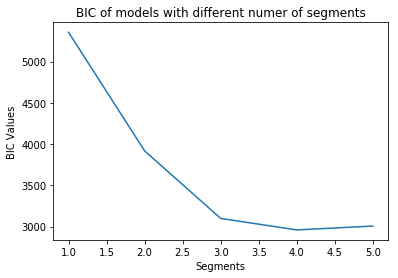

In [30]:
x=[1,2,3,4,5]
BIC=[BIC1,BIC2,BIC3,BIC4,BIC5]
plt.plot(x,BIC)
plt.title("BIC of models with different numer of segments")
plt.xlabel("Segments")
plt.ylabel("BIC Values")
plt.show()

Model with 4 segments has the lowest BIC value.

### Aggregate Elasticities 

Own Elasticity:
$e_{jj}=\frac{X_{jt} \sum_{s=1}^{S} \pi_s \beta_s P_{ijt|s} (1-P_{ijt|s})}{\sum_{s=1}^{S} \pi_s P_{ijt|s}}$

Cross Elasticity:
$e_{jk}=\frac{-X_{kt} \sum_{s=1}^{S} \pi_s \beta_s P_{ijt|s} P_{ijkt|s}}{\sum_{s=1}^{S} \pi_s P_{ijt|s}}$

In [35]:
def elas(df):
    e11=np.mean(((bf1*df['Feature 1']+bp1*df['Price 1'])*pi1*p11*(1-p11)+
        (bf2*df['Feature 1']+bp2*df['Price 1'])*pi2*p12*(1-p12)+
        (bf3*df['Feature 1']+bp3*df['Price 1'])*pi3*p13*(1-p13)+
        (bf4*df['Feature 1']+bp4*df['Price 1'])*pi4*p14*(1-p14))/
         Pi1t)
    
    e22=np.mean(((bf1*df['Feature 2']+bp1*df['Price 2'])*pi1*p21*(1-p21)+
        (bf2*df['Feature 2']+bp2*df['Price 2'])*pi2*p22*(1-p22)+
        (bf3*df['Feature 2']+bp3*df['Price 2'])*pi3*p23*(1-p23)+
        (bf4*df['Feature 2']+bp4*df['Price 2'])*pi4*p24*(1-p24))/
         Pi2t)
    
    e33=np.mean(((bf1*df['Feature 3']+bp1*df['Price 3'])*pi1*p31*(1-p31)+
        (bf2*df['Feature 3']+bp2*df['Price 3'])*pi2*p32*(1-p32)+
        (bf3*df['Feature 3']+bp3*df['Price 3'])*pi3*p33*(1-p33)+
        (bf4*df['Feature 3']+bp4*df['Price 3'])*pi4*p34*(1-p34))/
         Pi3t)

    e44=np.mean(((bf1*df['Feature 4']+bp1*df['Price 4'])*pi1*p41*(1-p41)+
        (bf2*df['Feature 4']+bp2*df['Price 4'])*pi2*p42*(1-p42)+
        (bf3*df['Feature 4']+bp3*df['Price 4'])*pi3*p43*(1-p43)+
        (bf4*df['Feature 4']+bp4*df['Price 4'])*pi4*p44*(1-p44))/
         Pi4t)
    
    #Cross Elasticities
    
    e12=np.mean(-((bf1*df['Feature 2']+bp1*df['Price 2'])*pi1*p11*p21+
        (bf2*df['Feature 2']+bp2*df['Price 2'])*pi2*p12*p22+
        (bf3*df['Feature 2']+bp3*df['Price 2'])*pi3*p13*p23+
        (bf4*df['Feature 2']+bp4*df['Price 2'])*pi4*p14*p24)/
         Pi1t)
    
    e13=np.mean(-((bf1*df['Feature 3']+bp1*df['Price 3'])*pi1*p11*p31+
        (bf2*df['Feature 3']+bp2*df['Price 3'])*pi2*p12*p32+
        (bf3*df['Feature 3']+bp3*df['Price 3'])*pi3*p13*p33+
        (bf4*df['Feature 3']+bp4*df['Price 3'])*pi4*p14*p34)/
         Pi1t)
    
    e14=np.mean(-((bf1*df['Feature 4']+bp1*df['Price 4'])*pi1*p11*p41+
        (bf2*df['Feature 4']+bp2*df['Price 4'])*pi2*p12*p42+
        (bf3*df['Feature 4']+bp3*df['Price 4'])*pi3*p13*p43+
        (bf4*df['Feature 4']+bp4*df['Price 4'])*pi4*p14*p44)/
         Pi1t)
    
    e21=np.mean(-((bf1*df['Feature 1']+bp1*df['Price 1'])*pi1*p11*p21+
        (bf2*df['Feature 1']+bp2*df['Price 1'])*pi2*p12*p22+
        (bf3*df['Feature 1']+bp3*df['Price 1'])*pi3*p13*p23+
        (bf4*df['Feature 1']+bp4*df['Price 1'])*pi4*p14*p24)/
         Pi2t)
    
    e23=np.mean(-((bf1*df['Feature 3']+bp1*df['Price 3'])*pi1*p21*p31+
        (bf2*df['Feature 3']+bp2*df['Price 3'])*pi2*p22*p32+
        (bf3*df['Feature 3']+bp3*df['Price 3'])*pi3*p23*p33+
        (bf4*df['Feature 3']+bp4*df['Price 3'])*pi4*p24*p34)/
         Pi2t)

    e24=np.mean(-((bf1*df['Feature 4']+bp1*df['Price 4'])*pi1*p21*p41+
        (bf2*df['Feature 4']+bp2*df['Price 4'])*pi2*p22*p42+
        (bf3*df['Feature 4']+bp3*df['Price 4'])*pi3*p23*p43+
        (bf4*df['Feature 4']+bp4*df['Price 4'])*pi4*p24*p44)/
         Pi2t)

    e31=np.mean(-((bf1*df['Feature 1']+bp1*df['Price 1'])*pi1*p11*p31+
        (bf2*df['Feature 1']+bp2*df['Price 1'])*pi2*p12*p32+
        (bf3*df['Feature 1']+bp3*df['Price 1'])*pi3*p13*p33+
        (bf4*df['Feature 1']+bp4*df['Price 1'])*pi4*p14*p34)/
         Pi3t)

    e32=np.mean(-((bf1*df['Feature 2']+bp1*df['Price 2'])*pi1*p31*p21+
        (bf2*df['Feature 2']+bp2*df['Price 2'])*pi2*p32*p22+
        (bf3*df['Feature 2']+bp3*df['Price 2'])*pi3*p33*p23+
        (bf4*df['Feature 2']+bp4*df['Price 2'])*pi4*p34*p24)/
         Pi3t)

    e34=np.mean(-((bf1*df['Feature 4']+bp1*df['Price 4'])*pi1*p31*p41+
        (bf2*df['Feature 4']+bp2*df['Price 4'])*pi2*p32*p42+
        (bf3*df['Feature 4']+bp3*df['Price 4'])*pi3*p33*p43+
        (bf4*df['Feature 4']+bp4*df['Price 4'])*pi4*p34*p44)/
         Pi3t)
    
    e41=np.mean(-((bf1*df['Feature 1']+bp1*df['Price 1'])*pi1*p11*p41+
        (bf2*df['Feature 1']+bp2*df['Price 1'])*pi2*p12*p42+
        (bf3*df['Feature 1']+bp3*df['Price 1'])*pi3*p13*p43+
        (bf4*df['Feature 1']+bp4*df['Price 1'])*pi4*p14*p44)/
         Pi4t)
    
    e42=np.mean(-((bf1*df['Feature 2']+bp1*df['Price 2'])*pi1*p41*p21+
        (bf2*df['Feature 2']+bp2*df['Price 2'])*pi2*p42*p22+
        (bf3*df['Feature 2']+bp3*df['Price 2'])*pi3*p43*p23+
        (bf4*df['Feature 2']+bp4*df['Price 2'])*pi4*p44*p24)/
         Pi4t)

    e43=np.mean(-((bf1*df['Feature 3']+bp1*df['Price 3'])*pi1*p41*p31+
        (bf2*df['Feature 3']+bp2*df['Price 3'])*pi2*p42*p32+
        (bf3*df['Feature 3']+bp3*df['Price 3'])*pi3*p43*p33+
        (bf4*df['Feature 3']+bp4*df['Price 3'])*pi4*p44*p34)/
         Pi4t)
    
    mat=pd.DataFrame({"Brand 1":[e11,e21,e31,e41], "Brand2":[e12,e22,e32,e42],
                  "Brand 3":[e13,e23,e33,e43],'Brand 4':[e14,e24,e34,e44]})
    mat.index=["Brand 1","Brand 2", "Brand 3", "Brand 4"]
    print("Aggregare Elasiticy Matrix with Four Segments")
    return mat

In [36]:
elas(df)

Aggregare Elasiticy Matrix with Four Segments


,Brand 1,Brand2,Brand 3,Brand 4
Brand 1,-1.673506,0.755548,0.082491,0.281311
Brand 2,0.796647,-1.031562,0.073396,0.221422
Brand 3,1.687412,1.436884,-2.325377,0.653312
Brand 4,0.830378,0.618483,0.095736,-1.418563


### IIA Test

In [44]:
#Subset of the data where Brand 1 is not chosen
df=df[df["Brand 1"] != 1]

In [42]:
a11,a21,a31,bf1,bp1,a12,a22,a32,bf2,bp2,\
    a13,a23,a33,bf3,bp3,a14,a24,a34,bf4,bp4,lam1,lam2,lam3 = results4.x

In [43]:
ev21=np.exp(a21+bf1*df['Feature 2']+bp1*df['Price 2'])
ev31=np.exp(a31+bf1*df['Feature 3']+bp1*df['Price 3'])
ev41=np.exp(0+bf1*df['Feature 4']+bp1*df['Price 4'])
denom1=ev21+ev31+ev41
df['pc1']=(ev21*df['Brand  2']+ev31*df['Brand 3']+ev41*df['Brand 4'])/denom1

ev22=np.exp(a22+bf2*df['Feature 2']+bp2*df['Price 2'])
ev32=np.exp(a32+bf2*df['Feature 3']+bp2*df['Price 3'])
ev42=np.exp(0+bf2*df['Feature 4']+bp2*df['Price 4'])
denom2=ev22+ev32+ev42
df['pc2']=(ev22*df['Brand  2']+ev32*df['Brand 3']+ev42*df['Brand 4'])/denom2

ev23=np.exp(a23+bf3*df['Feature 2']+bp3*df['Price 2'])
ev33=np.exp(a33+bf3*df['Feature 3']+bp3*df['Price 3'])
ev43=np.exp(0+bf3*df['Feature 4']+bp3*df['Price 4'])
denom3=ev23+ev33+ev43
df['pc3']=(ev23*df['Brand  2']+ev33*df['Brand 3']+ev43*df['Brand 4'])/denom3

ev24=np.exp(a24+bf4*df['Feature 2']+bp4*df['Price 2'])
ev34=np.exp(a34+bf4*df['Feature 3']+bp4*df['Price 3'])
ev44=np.exp(0+bf4*df['Feature 4']+bp4*df['Price 4'])
denom4=ev24+ev34+ev44
df['pc4']=(ev24*df['Brand  2']+ev34*df['Brand 3']+ev44*df['Brand 4'])/denom4
    

pc_agg=df.groupby("Pan I.D.")['pc1','pc2','pc3','pc4'].prod()
    
pi1=np.exp(lam1)/(1+np.exp(lam1) + np.exp(lam2) + np.exp(lam3))
pi2=np.exp(lam2)/(1+np.exp(lam1) + np.exp(lam2) + np.exp(lam3))
pi3=np.exp(lam3)/(1+np.exp(lam1) + np.exp(lam2) + np.exp(lam3))
pi4=1-pi1-pi2-pi3
    
pc_agg_seg=pi1*pc_agg["pc1"]+pi2*pc_agg["pc2"]+pi3*pc_agg["pc3"]+pi4*pc_agg["pc4"]
    
Inpc=np.log(pc_agg_seg)
LLFR=np.sum(Inpc)
LLFR

-533.0039978817342

In [47]:
def critR(params,df):

    a21,a31,bf1,bp1,a22,a32,bf2,bp2,\
        a23,a33,bf3,bp3,a24,a34,bf4,bp4,lam1,lam2,lam3=params
    
    #Segment 1
    ev21=np.exp(a21+bf1*df['Feature 2']+bp1*df['Price 2'])
    ev31=np.exp(a31+bf1*df['Feature 3']+bp1*df['Price 3'])
    ev41=np.exp(0+bf1*df['Feature 4']+bp1*df['Price 4'])
    denom1=ev21+ev31+ev41
    df['pc1_4']=(ev21*df['Brand  2']+ev31*df['Brand 3']+ev41*df['Brand 4'])/denom1
    
    #Segment 2
    ev22=np.exp(a22+bf2*df['Feature 2']+bp2*df['Price 2'])
    ev32=np.exp(a32+bf2*df['Feature 3']+bp2*df['Price 3'])
    ev42=np.exp(0+bf2*df['Feature 4']+bp2*df['Price 4'])
    denom2=ev22+ev32+ev42
    df['pc2_4']=(ev22*df['Brand  2']+ev32*df['Brand 3']+ev42*df['Brand 4'])/denom2

    #Segment 3
    ev23=np.exp(a23+bf3*df['Feature 2']+bp3*df['Price 2'])
    ev33=np.exp(a33+bf3*df['Feature 3']+bp3*df['Price 3'])
    ev43=np.exp(0+bf3*df['Feature 4']+bp3*df['Price 4'])
    denom3=ev23+ev33+ev43
    df['pc3_4']=(ev23*df['Brand  2']+ev33*df['Brand 3']+ev43*df['Brand 4'])/denom3
    
    #Segment 4
    ev24=np.exp(a24+bf4*df['Feature 2']+bp4*df['Price 2'])
    ev34=np.exp(a34+bf4*df['Feature 3']+bp4*df['Price 3'])
    ev44=np.exp(0+bf4*df['Feature 4']+bp4*df['Price 4'])
    denom4=ev24+ev34+ev44
    df['pc4_4']=(ev24*df['Brand  2']+ev34*df['Brand 3']+ev44*df['Brand 4'])/denom4
    
    #Probability of belonging to each segment
    pi1=np.exp(lam1)/(1+np.exp(lam1) + np.exp(lam2) + np.exp(lam3))
    pi2=np.exp(lam2)/(1+np.exp(lam1) + np.exp(lam2) + np.exp(lam3))
    pi3=np.exp(lam3)/(1+np.exp(lam1) + np.exp(lam2) + np.exp(lam3))
    pi4=1-pi1-pi2-pi3    
    
    #Aggregated Log Likelihood
    pc_agg=df.groupby("Pan I.D.")['pc1_4','pc2_4','pc3_4','pc4_4'].prod()
    pc_agg_seg=pi1*pc_agg["pc1_4"]+pi2*pc_agg["pc2_4"]+pi3*pc_agg["pc3_4"]+pi4*pc_agg["pc4_4"]
    Inpc=np.log(pc_agg_seg)   
    LL=np.sum(Inpc)
    
    return -LL

In [48]:
params_init = np.array([a21+0.01,a31+0.01,bf1+0.01,bp1+0.01,\
                        a22-0.01,a32-0.01,bf2-0.01,bp2-0.01,\
                        a23+0.01,a33+0.01,bf3+0.01,bp3+0.01,\
                        a2,a3,bf,bp,0,0,0])
results4R = opt.minimize(critR, params_init,df,tol=1e-20, method='L-BFGS-B')

LLR=-results4R.fun

In [49]:
from scipy.stats import chi2
MMT=-2*(LLFR-LLR)
1 - chi2.cdf(MMT, 4)

1.8762769116165146e-14

The probability of seeing the null hypothesis is very low. So IIA condition is violated in the model.

### Posterior Assignment

Assign the household to the segment for which it has the highest posterior probability $\pi_{is}$

Use model with two segments for faster calculation.

In [55]:
def crit(params,df):

    a11,a21,a31,bf1,bp1,a12,a22,a32,bf2,bp2,lam=params
    
    ev11=np.exp(a11+bf1*df['Feature 1']+bp1*df['Price 1'])
    ev21=np.exp(a21+bf1*df['Feature 2']+bp1*df['Price 2'])
    ev31=np.exp(a31+bf1*df['Feature 3']+bp1*df['Price 3'])
    ev41=np.exp(0+bf1*df['Feature 4']+bp1*df['Price 4'])
    denom1=ev11+ev21+ev31+ev41
    df['pc1']=(ev11*df['Brand 1']+ev21*df['Brand  2']+ev31*df['Brand 3']+ev41*df['Brand 4'])/denom1

    ev12=np.exp(a12+bf2*df['Feature 1']+bp2*df['Price 1'])
    ev22=np.exp(a22+bf2*df['Feature 2']+bp2*df['Price 2'])
    ev32=np.exp(a32+bf2*df['Feature 3']+bp2*df['Price 3'])
    ev42=np.exp(0+bf2*df['Feature 4']+bp2*df['Price 4'])
    denom2=ev12+ev22+ev32+ev42
    df['pc2']=(ev12*df['Brand 1']+ev22*df['Brand  2']+ev32*df['Brand 3']+ev42*df['Brand 4'])/denom2
    
    global pc_agg
    pc_agg=df.groupby("Pan I.D.")['pc1','pc2'].prod()
    
    pi=np.exp(lam)/(1+np.exp(lam))
    pc_agg_seg=pc_agg['pc1']*pi+pc_agg['pc2']*(1-pi)
    
    #"Posterior" probabilities 
    pc_agg["pi_i1"]=pc_agg['pc1']*pi/pc_agg_seg
    pc_agg["pi_i2"]=pc_agg['pc2']*pi/pc_agg_seg

    Inpc=np.log(pc_agg_seg)
    
    LL=np.sum(Inpc)
    
    return -LL

a11,a21,a31,bf1,bp1,a12,a22,a32,bf2,bp2,lam=\
     a1+0.01,a2+0.01,a3+0.01,bf+0.01,bp+0.01,a1-0.01,a2-0.01,a3-0.01,bf-0.01,bp-0.01,0
params_init = np.array([a11,a21,a31,bf1,bp1,a12,a22,a32,bf2,bp2,lam])
results2P = opt.minimize(crit, params_init,df,tol=1e-20, method='L-BFGS-B')
a11,a21,a31,bf1,bp1,a12,a22,a32,bf2,bp2,lam = results2P.x

pd.DataFrame({"Seg1":[a11,a21,a31,bf1,bp1],'Seg2':[a12,a22,a32,bf2,bp2]},
             index=['a1','a2','a3','bf','bp'])

,Seg1,Seg2
a1,2.697884,1.333542
a2,3.852038,-1.294329
a3,-0.673545,-4.284921
bf,1.426345,0.377341
bp,-50.363053,-36.917332


In [70]:
print("Probability of belonging to seg 1:",np.exp(lam)/(1+np.exp(lam)))
print("Probability of belonging to seg 2:",1-np.exp(lam)/(1+np.exp(lam)))

Probability of belonging to seg 1: 0.47628029319940324
Probability of belonging to seg 2: 0.5237197068005968


In [71]:
pc_agg['Posterior']=np.where(pc_agg['pi_i1']>pc_agg['pi_i2'],1,2)

In [72]:
pc_agg.head()

,pc1,pc2,pi_i1,pi_i2,Posterior
Pan I.D.,,,,,
1,1.245521e-04,1.272395e-08,9.998877e-01,0.000102,1
2,1.228780e-31,1.386223e-08,8.061296e-24,0.909418,2
3,3.154745e-06,2.165600e-06,5.698551e-01,0.391182,1
4,2.059977e-10,5.314824e-15,9.999716e-01,0.000026,1
5,2.998505e-07,5.982756e-11,9.997807e-01,0.000199,1


In [81]:
print("Posterior probability of belonging to seg 1:",sum(pc_agg['Posterior']==1)/100)
print("posterior pProbability of belonging to seg 2:",sum(pc_agg['Posterior']==2)/100)
print("Maximized Log Likelihood Function Value:",-results2P.fun)

Posterior probability of belonging to seg 1: 48
posterior pProbability of belonging to seg 2: 52
Maximized Log Likelihood Function Value: -1915.8010526842286


### Concomitant variable model

Probability of segment membership depends on a household's demographic profile (concomitant variabales here are income and size).

In [83]:
def crit(params,df):

    a11,a21,a31,bf1,bp1,a12,a22,a32,bf2,bp2,lam,g_in,g_hh=params
    
    ev11=np.exp(a11+bf1*df['Feature 1']+bp1*df['Price 1'])
    ev21=np.exp(a21+bf1*df['Feature 2']+bp1*df['Price 2'])
    ev31=np.exp(a31+bf1*df['Feature 3']+bp1*df['Price 3'])
    ev41=np.exp(0+bf1*df['Feature 4']+bp1*df['Price 4'])
    denom1=ev11+ev21+ev31+ev41
    df['pc1']=(ev11*df['Brand 1']+ev21*df['Brand  2']+ev31*df['Brand 3']+ev41*df['Brand 4'])/denom1

    ev12=np.exp(a12+bf2*df['Feature 1']+bp2*df['Price 1'])
    ev22=np.exp(a22+bf2*df['Feature 2']+bp2*df['Price 2'])
    ev32=np.exp(a32+bf2*df['Feature 3']+bp2*df['Price 3'])
    ev42=np.exp(0+bf2*df['Feature 4']+bp2*df['Price 4'])
    denom2=ev12+ev22+ev32+ev42
    df['pc2']=(ev12*df['Brand 1']+ev22*df['Brand  2']+ev32*df['Brand 3']+ev42*df['Brand 4'])/denom2
    
    
    pc_agg=df.groupby("Pan I.D.")['pc1','pc2'].prod()
    
    new_lam=lam+g_in*df['Income']+g_hh*df['HH Size']
    pi=np.exp(new_lam)/(1+np.exp(new_lam))
    df['pi']=pi
    global pi_tab
    pi_tab=df.groupby("Pan I.D.")['Income','HH Size','pi'].mean()
    
    pc_agg_seg=pc_agg['pc1']*pi+pc_agg['pc2']*(1-pi)
    

    Inpc=np.log(pc_agg_seg)
    
    LL=np.sum(Inpc)
    
    return -LL

a11,a21,a31,bf1,bp1,a12,a22,a32,bf2,bp2,lam,g_in,g_hh=\
     a1+0.01,a2+0.01,a3+0.01,bf+0.01,bp+0.01,a1-0.01,a2-0.01,a3-0.01,bf-0.01,bp-0.01,0,0.1,-0.1
params_init = np.array([a11,a21,a31,bf1,bp1,a12,a22,a32,bf2,bp2,lam,g_in,g_hh])
results2D = opt.minimize(crit, params_init,df,tol=1e-20, method='L-BFGS-B')
a11,a21,a31,bf1,bp1,a12,a22,a32,bf2,bp2,lam,g_in,g_hh = results2D.x

pd.DataFrame({"Seg1":[a11,a21,a31,bf1,bp1],'Seg2':[a12,a22,a32,bf2,bp2]},
             index=['a1','a2','a3','bf','bp'])

,Seg1,Seg2
a1,2.701662,1.330459
a2,3.857287,-1.291682
a3,-0.682615,-4.267838
bf,1.434031,0.377695
bp,-50.571787,-36.792921


In [86]:
g_in,g_hh,lam

(0.07824634523533526, -0.2250136467949197, -0.12649894037340007)

In [84]:
print("Maximized Log Likelihood Function Value:",-results2D.fun)

Maximized Log Likelihood Function Value: -1915.3119577167897


In [87]:
pi_tab.head(5)

,Income,HH Size,pi
Pan I.D.,,,
1,9,2,0.531879
2,7,2,0.492800
3,1,1,0.432105
4,11,2,0.570572
5,8,3,0.456220
